In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('/Users/fipm/code/abefarkas/Thalassa_Regime_Classifier/raw_data/BTCUSDT_S_DEPTH_20220519.csv')
data.head(4)

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

class DataPipeline(TransformerMixin, BaseEstimator):
    def __init__(self):
        self.pipeline = Pipeline([            
            ('Imputer', SimpleImputer(strategy = 'mean')),
            ('scaler', MinMaxScaler()),
            ])
       
    def financial_features(self, data):
        self.data = data
        
        # self.data
        self.data['self.data'] = (self.data['bp1']*self.data['bs1']
                +self.data['bp2']*self.data['bs2']
                +self.data['ap1']*self.data['as1']
                +self.data['ap2']*self.data['as2'])/(self.data['bs1']+
                                            self.data['bs2']+
                                            self.data['as1']+
                                            self.data['as2'])
    
        # log_price
        self.data['log_price'] = np.log(self.data['WAP'])
        
        # log_returns
        self.data['log_returns'] = self.data.log_price.diff()

        # realized_volatility
        self.data['realized_volatility'] = np.std(self.data.log_returns)
        
        # volatility_t+1
        self.data['volatility_t+1'] = self.data['realized_volatility'].shift(-1)
        
        return self.data

    
    def pipeline(self, data):
        return self.preproc.fit_transform(data)

    
    def fit(self, data, y=None):
        self.data = data
        
        return self
    
    def transform(self, data):
        return self.data
        

In [ ]:
class my_model(TransformerMixin, BaseEstimator):
    def __init__(self):
        self.model = LinearRegression()

    def fit(self, data, y=None):
        X = data[['log_price']]
        y = data['realized_volatility']
        self.model.fit(X, y)
        return self
    
    def transform(self, data):
        return self
    
    def predict(self, data):
        X = data[['log_price']]
        return self.model.predict(X)
        
        
        
        

In [ ]:
preproc = Pipeline([
            ('FinFeatures', FinancialFeatures()),
            ('my_model', my_model())
            ])
preproc

In [ ]:
preproc.fit_transform(data).predict(data)



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 1. initialize the model
arima = ARIMA(y_train, order=(2, 1,3), trend='t')
# 2. fit the models
arima = arima.fit()
arima.summary()

In [2]:
data = pd.read_csv('/Users/fipm/code/abefarkas/Thalassa_Regime_Classifier/raw_data/data_set.csv')
data.head(4)


,Unnamed: 0,primary_key,bp1,bs1,bp2,bs2,bp3,bs3,bp4,bs4,...,ap16,as16,ap17,as17,ap18,as18,ap19,as19,ap20,as20
0,0,2022-05-19 00:00:15,28720.075362,3.772080,28719.533333,1.405377,28719.011594,0.626551,28718.371014,0.505087,...,28724.006522,0.418891,28724.167391,0.487558,28724.361594,0.706101,28724.511594,0.707326,28724.657971,1.104145
1,1,2022-05-19 00:00:45,28755.960345,1.878828,28755.570690,0.335776,28755.050000,0.573517,28754.684483,0.737259,...,28760.520690,7.383086,28760.674138,4.193586,28760.872414,0.620983,28761.067241,0.773897,28761.250000,0.854017
2,2,2022-05-19 00:01:15,28782.703333,1.771600,28782.131667,0.536867,28781.485000,0.402600,28781.140000,0.382467,...,28787.931667,0.427633,28788.138333,0.580383,28788.331667,0.421400,28788.506667,0.376617,28788.750000,0.425300
3,3,2022-05-19 00:01:45,28789.470000,1.767750,28788.766667,0.343217,28788.278333,0.243650,28788.046667,0.325300,...,28793.874833,0.486350,28794.093333,0.346800,28794.290000,1.161250,28794.483000,0.536067,28794.623333,0.395067


In [9]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timezone, timedelta

class DataModelPipeline():
    def __init__(self):
        self.preprocessing = Pipeline([            
            ('Imputer', SimpleImputer(strategy = 'mean')),
            # ('scaler', MinMaxScaler()),
            ])
        self.data = None
        self.y = None
        self.X = None
       
    def financial_features(self, data):
        self.data = data.copy()
        
        # unix_timestamp = lambda x: datetime.fromtimestamp(x/1000.0, tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S')
        str2date = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
        # self.data['primary_key']=self.data['ts'].apply(unix_timestamp).apply(str2date)
        self.data['primary_key']=self.data['primary_key'].apply(str2date)
        
        # WAP
        self.data['WAP'] = (self.data['bp1']*self.data['bs1']
                +self.data['bp2']*self.data['bs2']
                +self.data['ap1']*self.data['as1']
                +self.data['ap2']*self.data['as2'])/(self.data['bs1']+
                                            self.data['bs2']+
                                            self.data['as1']+
                                            self.data['as2'])
    
        # log_price
        self.data['log_price'] = np.log(self.data['WAP'])
        
        # log_returns
        self.data['log_returns'] = self.data.log_price.diff()

        
        # self.data.set_index('primary_key', inplace=True)
        # self.data = self.data.groupby(pd.Grouper(key='primary_key', axis=0, freq='M')).std()
        # print(self.data)
        # self.data['realized_volatility'] = self.data['log_returns']
        # self.data.reset_index(inplace=True)
        
        # realized_volatility
        y = self.data[['primary_key','log_returns']]                
        y = y.rolling(30).std()        
        # moving the index as a column
        # y.reset_index(inplace=True)
        self.data['realized_volatility'] = y['log_returns']
        
        
        
        
        # self.data['realized_volatility'] = np.std(self.data.log_returns)
        
        # volatility_t+1
        # self.data['volatility_t+1'] = self.data['realized_volatility'].shift(-1)
        
        # droping any text variables
        self.data.drop(columns=['Unnamed: 0'], inplace=True)
        
        return self.data

    
    def pipeline(self, data):
        data = data.dropna().reset_index(drop=True)
        # self.y = data[['primary_key','realized_volatility']].set_index('primary_key')        
        self.y = data[['realized_volatility']]
        
        X = data.drop(columns=['realized_volatility','primary_key'])                 
        self.X = pd.DataFrame(self.preprocessing.fit_transform(X), columns=self.preprocessing.get_feature_names_out())
        return self.y, self.X

    def predict(self, model, new_data, steps=2):
        # only works for arima 
        n = pd.DataFrame.from_dict({'realized_volatility':new_data})
        y_new = pd.concat((self.y, n)).reset_index(drop=True)
        new_model = model.apply(y_new)
        return new_model.forecast(steps)

/var/folders/91/6wbfy1kd3c54vx64tq8sck_00000gn/T/ipykernel_1669/1950621712.py:50: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['primary_key'], dtype='object')
  y = y.rolling(30).std()


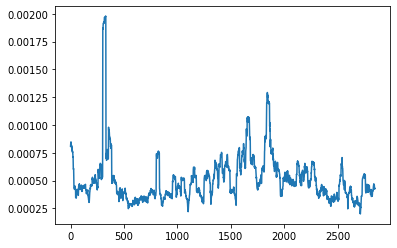

In [10]:
import matplotlib.pyplot  as plt
data_model_pipeline = DataModelPipeline()
df = data_model_pipeline.financial_features(data)
df.head(3)
y, X = data_model_pipeline.pipeline(df)

plt.plot(y)



In [11]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

# 1. initialize the model
# arima = ARIMA(y, order=(1, 0,0), missing='drop')
arima = ARIMA(y, order=(1, 0,0))
# 2. fit the models
arima_fitted = arima.fit()
arima_fitted.summary()

/Users/fipm/.pyenv/versions/3.8.12/envs/thalassa/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     realized_volatility   No. Observations:                 2850
Model:                  ARIMA(1, 0, 0)   Log Likelihood               25017.724
Date:                 Tue, 31 May 2022   AIC                         -50029.449
Time:                         07:47:24   BIC                         -50011.583
Sample:                              0   HQIC                        -50023.006
                                - 2850                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005    4.9e-05     10.393      0.000       0.000       0.001
ar.L1          0.9858   1.61e-06   6.11e+05      0.000       0.986       0.986
sigma2      1.388e-09   5.21e-12    266.226      0.000    1.38e-09     1.4e-09
===================================================================================
Ljung-Box (L1) (Q):                  88.47   Jarque-Bera (JB):          29628515.42
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             6.68
Prob(H) (two-sided):                  0.00   Kurtosis:                       502.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+31. Standard errors may be unstable.
"""

In [12]:
data_model_pipeline.predict(arima_fitted, [1], 2)


2851    0.985779
2852    0.971760
Name: predicted_mean, dtype: float64

In [109]:
def predict(model, new_data, steps=2):
    n = pd.DataFrame.from_dict({'realized_volatility':new_data})
    y_new = pd.concat((self.data,n)).reset_index(drop=True)
    new_model = model.apply(data)
    return new_model.forecast(steps)


n = pd.DataFrame.from_dict({'realized_volatility':[1]})
y_new = pd.concat((y,n)).reset_index(drop=True)
print(y_new)
predict(arima_fitted, y_new, steps=2)

      realized_volatility
0                0.000809
1                0.000833
2                0.000835
3                0.000836
4                0.000848
...                   ...
2846             0.000431
2847             0.000433
2848             0.000433
2849             0.000429
2850             1.000000

[2851 rows x 1 columns]


2851    0.985779
2852    0.971760
Name: predicted_mean, dtype: float64

<AxesSubplot:title={'center':'Probability of being in a low-variance regime'}>

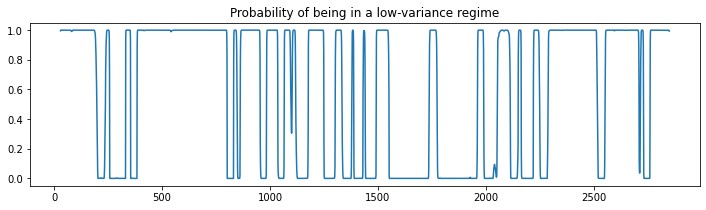

In [139]:
import statsmodels.api as sm
i=30
mod_hamilton = sm.tsa.MarkovRegression(
    1000*y[i:], k_regimes=2, 
    exog=1000*y[:-i],
    switching_variance=True
)
res_hamilton = mod_hamilton.fit()
res_hamilton.summary()
res_hamilton.smoothed_marginal_probabilities[0].plot(
    title="Probability of being in a low-variance regime", figsize=(12, 3)
)

In [152]:
res_hamilton.predict(start=2850, end=2851)


NotImplementedError: 